In [1]:
import pandas as pd
import geopandas as gpd
import osmnx as ox
from shapely.geometry import Point
import xlrd
import matplotlib.pyplot as plt
import numpy as np
import contextily as cx
import folium
from folium.features import DivIcon
from folium import IFrame
import json
import seaborn as sns
from PIL import Image
import math
from matplotlib.pyplot import figure

# 1. Read data

In [2]:
# data path
path_excel = (r'..\kristina_nbs\traffic_KP.xlsx')
# load data frame
df_start = pd.read_excel(path_excel, engine='openpyxl', sheet_name='Sheet1', index_col=0)
# convert to geodf with geometry column
df = df_start.copy()
df = gpd.GeoDataFrame(df, geometry = gpd.points_from_xy(df['Longitude'], df['Latitude']))
df

,Directions,Street,Abschnitt,Longitude,Latitude,Reference_station,Distance to ref,geometry
Code,,,,,,,,
8010_205,EastWest,Grabengürtel,Unterflurstrasse,15.426301,47.087794,NaN,NaN,POINT (15.42630 47.08779)
8010_208,SouthNorth,Glacis,Geidorfplatz,15.443536,47.077866,NaN,NaN,POINT (15.44354 47.07787)
8010_209,EastWest,Elisabethstrasse,Hartenaugasse,15.457930,47.076679,NaN,NaN,POINT (15.45793 47.07668)
8010_213,East,Grazbachgasse,Klosterwiesgasse,15.444325,47.065714,OST,NaN,POINT (15.44432 47.06571)
8010_214,SouthNorth,C.v. Hötzendorf-Straße,Ostbahnhof,15.448640,47.054039,NaN,NaN,POINT (15.44864 47.05404)
8020_102,SouthNorth,Wiener Str.,Kalvariengürtel,15.414366,47.084801,NORD,NaN,POINT (15.41437 47.08480)
8020_103,SouthNorth,Bahnhofgürtel,Keplerstrasse,15.418547,47.073193,NaN,NaN,POINT (15.41855 47.07319)
8020_107,SouthNorth,Triesterstrasse,Lauzilgasse,15.429734,47.045648,NaN,NaN,POINT (15.42973 47.04565)
8020_110,SouthNorth,Kärntner Str. Q2,südl. d. Wetzelsdorfer Straße,15.418848,47.058659,DONBOSCO,NaN,POINT (15.41885 47.05866)


# 2. Plot all measurements in Graz

In [3]:
# Graz area
place_name = "Graz, Austria"
area = ox.geocode_to_gdf(place_name)

C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\osmnx\geocoder.py:110: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gdf = gdf.append(_geocode_query_to_gdf(q, wr, by_osmid))


* EPSG in df and area must match

In [4]:
print(df.crs)
print(area.crs)

None
epsg:4326


In [5]:
df.crs = 'epsg:4326'
print(df.crs)

epsg:4326


In [6]:
for x, y, label in zip(df.geometry.x, df.geometry.y, df.index):
    if label in ['Nord','Ost','West','DonBosco','Sud']:
        print(label,x,y)

Nord 15.415122 47.09437
Ost 15.466634 47.05953
West 15.403728 47.069506
DonBosco 15.416539 47.055617
Sud 15.433078 47.041692


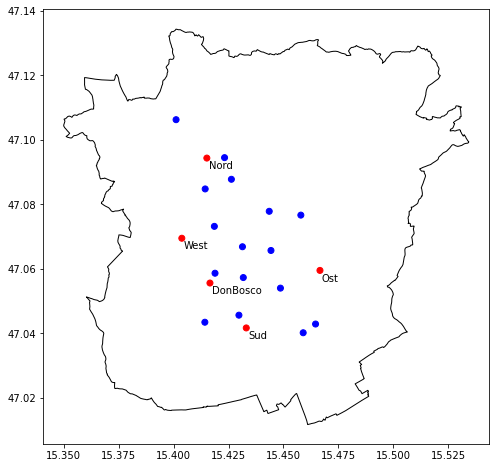

In [7]:
# color main stations as red
df['color'] = np.nan
for i in df.index:
    if df.loc[i].name in ['Nord','Ost','West','DonBosco','Sud']:
        df.loc[i, 'color'] = 'red'
    else:
        df.loc[i, 'color'] = 'blue'

ax = area.plot(figsize = (10,8), color='white', edgecolor='black')
df.plot(ax=ax, color=df.color)
for x, y, label in zip(df.geometry.x, df.geometry.y, df.index):
    if label in ['Nord','Ost','West','DonBosco','Sud']:
        ax.annotate(label, xy=(x, y), xytext=(2, -11), textcoords="offset points")
plt.show()


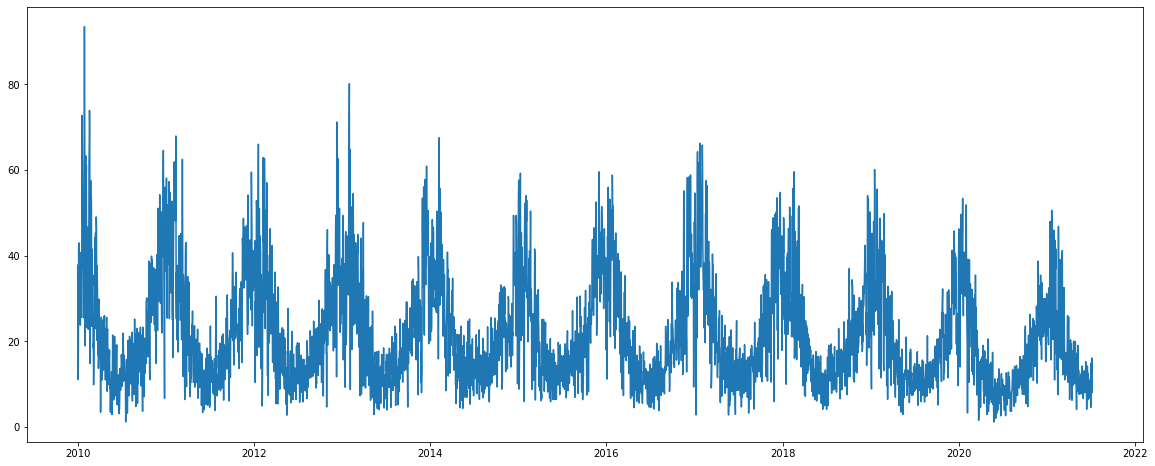

<Figure size 432x288 with 0 Axes>

In [23]:
y = uap['N_NO2']
uap.index = pd.to_datetime(uap.index)
x = uap.index
graf = plt.figure(figsize=(20,8))
plt.plot(y)
plt.show()
plt.savefig('graf.jpg')

In [130]:
a

,0
0,2010/01/01
1,2010/01/02
2,2010/01/03
3,2010/01/04
4,2010/01/05
...,...
4201,2021/07/03
4202,2021/07/04
4203,2021/07/05
4204,2021/07/06


In [149]:
y = uap['N_NO2']
y = pd.DataFrame(y)
a = y.index = pd.to_datetime(uap.index)
a = pd.DataFrame(a)
a = a.apply(lambda x: x.dt.strftime('%Y/%m/%d'))

y = y.reset_index()

In [150]:
y = pd.DataFrame.join(y,a)
y

,index,N_NO2,0
0,2010-01-01,37.758297,2010/01/01
1,2010-01-02,25.938934,2010/01/02
2,2010-01-03,11.074873,2010/01/03
3,2010-01-04,18.268064,2010/01/04
4,2010-01-05,41.781490,2010/01/05
...,...,...,...
4201,2021-07-03,14.935202,2021/07/03
4202,2021-07-04,8.624179,2021/07/04
4203,2021-07-05,16.112087,2021/07/05
4204,2021-07-06,7.977263,2021/07/06


In [152]:
y.columns

Index(['index', 'N_NO2', 0], dtype='object')

In [156]:
y.drop('index', axis=1, inplace=True)

In [157]:
y

,N_NO2,0
0,37.758297,2010/01/01
1,25.938934,2010/01/02
2,11.074873,2010/01/03
3,18.268064,2010/01/04
4,41.781490,2010/01/05
...,...,...
4201,14.935202,2021/07/03
4202,8.624179,2021/07/04
4203,16.112087,2021/07/05
4204,7.977263,2021/07/06


In [159]:
r = y.to_dict('dict')
r

{'N_NO2': {0: 37.758297,
  1: 25.938934,
  2: 11.074873,
  3: 18.26806400000001,
  4: 41.78149000000001,
  5: 42.980854,
  6: 29.495953000000004,
  7: 32.90979,
  8: 35.09085,
  9: 40.81042,
  10: 32.572132,
  11: 23.779999,
  12: 30.789572,
  13: 36.542126,
  14: 34.027664,
  15: 25.595615,
  16: 37.81808,
  17: 37.061916,
  18: 72.69933,
  19: 65.89148,
  20: 51.439358,
  21: 47.258083,
  22: 38.79872,
  23: 34.418087,
  24: 25.46383,
  25: 34.02617,
  26: 48.4734,
  27: 69.21106999999999,
  28: 93.462555,
  29: 77.61596,
  30: 56.211494,
  31: 18.914236,
  32: 61.173244,
  33: 63.338924,
  34: 63.10574,
  35: 56.31106,
  36: 61.13235,
  37: 35.872337,
  38: 23.230835,
  39: 27.610645,
  40: 31.524038,
  41: 39.36383,
  42: 27.665318,
  43: 46.710007,
  44: 22.80298,
  45: 28.2583,
  46: 38.070427,
  47: 61.18043,
  48: 66.19,
  49: 73.906166,
  50: 69.67381999999999,
  51: 14.826954999999998,
  52: 33.303455,
  53: 51.62383300000001,
  54: 57.52447,
  55: 51.233192,
  56: 54.2414930

In [160]:

m = folium.Map(location = [47.0707, 15.4395], zoom_start = 12, tiles = "Stamen Terrain")
feature_group = folium.FeatureGroup("Locations")

for x, y, label in zip(df.geometry.x, df.geometry.y, df.index):
    if label in ['Nord','Ost','West','DonBosco','Sud']:
        feature_group.add_child(folium.Marker(location=[y,x],popup=folium.Popup(max_width=450).add_child(
        folium.Vega(r, width=450, height=250)), icon=folium.Icon(icon="cloud")))
        

m.add_child(feature_group)
m

# 3. Add map background

* change EPSG to 3857

In [9]:
gdf = df.to_crs('epsg:3857')
area = area.to_crs('epsg:3857')
print(gdf.crs)
print(area.crs)

epsg:3857
epsg:3857


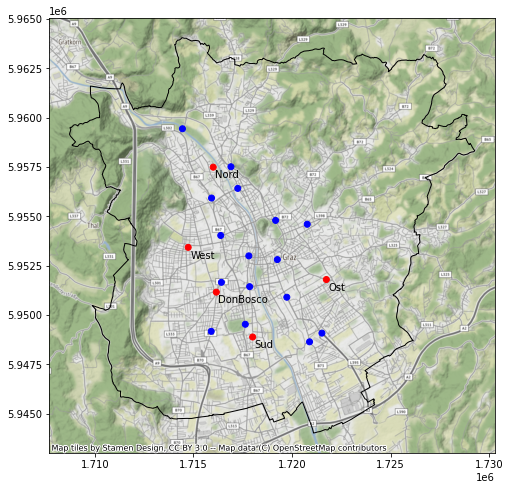

In [18]:
ax = area.plot(figsize = (10,8), color='none', edgecolor='black')
cx.add_basemap(ax)
gdf.plot(ax=ax, color=gdf.color)
for x, y, label in zip(gdf.geometry.x, gdf.geometry.y, gdf.index):
     if label in ['Nord','Ost','West','DonBosco','Sud']:
         ax.annotate(label, xy=(x, y), xytext=(2, -11), textcoords="offset points")
plt.show()


# 4. Calculate distance between main stations (red) and measurements (blue)

In [23]:
# make 2 dfs, one with measurements(blue) and one with main stations(red)
gdf_1 = gdf[:'8053_111'] #measurements(blue)
gdf_2 = gdf['Nord':] #main(red)
gdf_1.head(2)

,Directions,Street,Abschnitt,Longitude,Latitude,Reference_station,Distance to ref,geometry,color
Code,,,,,,,,,
8010_205,EastWest,Grabengürtel,Unterflurstrasse,15.426301,47.087794,NaN,NaN,POINT (1717247.972 5956416.080),blue
8010_208,SouthNorth,Glacis,Geidorfplatz,15.443536,47.077866,NaN,NaN,POINT (1719166.564 5954793.060),blue


* Project in a local coordinate system for Austria

In [24]:
gdf_1 = gdf_1.to_crs('epsg:31290')
gdf_2 = gdf_2.to_crs('epsg:31290')

In [25]:
# calculate distance to main stations
dist_df = gdf_1.geometry.apply(lambda g: gdf_2.distance(g))
# add prefix 'distance_' to each column and sort alphabetically
dist_df = dist_df.add_prefix('distance_').sort_index(axis=1)
# filter out closest main stations and matching minimum distance
dist_df['closest'] = dist_df.idxmin(axis=1).apply(lambda x: x[9:])
dist_df['minimum'] = np.round(dist_df.iloc[:,:5].min(axis=1), 2)
dist_df.columns.name = ''
# add geometries
dist_df.insert(0, column='Longitude', value=gdf_1['Longitude'])
dist_df.insert(0, column='Latitude', value=gdf_1['Latitude'])
dist_df.insert(0, column='geometry', value=gdf_1['geometry'])
# add points coloring
dist_df.insert(10, column='color', value=gdf_1['color'])
# add geometries of main stations
dist_df = dist_df.append(gdf_2[['geometry','Latitude','Longitude','color']])
dist_df

C:\Users\vpetric\AppData\Local\Temp/ipykernel_13108/3197551250.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dist_df = dist_df.append(gdf_2[['geometry','Latitude','Longitude','color']])


,geometry,Latitude,Longitude,distance_DonBosco,distance_Nord,distance_Ost,distance_Sud,distance_West,closest,minimum,color
Code,,,,,,,,,,,
8010_205,POINT (681212.314 5216919.278),47.087794,15.426301,3653.457417,1120.294237,4388.585311,5151.368970,2659.564644,Nord,1120.29,blue
8010_208,POINT (682508.391 5215800.485),47.077866,15.443536,3213.225047,2832.422263,2689.680221,4099.519531,3163.295145,Ost,2689.68,blue
8010_209,POINT (683600.063 5215656.152),47.076679,15.457930,3920.485632,3799.518044,2017.995362,4323.865071,4193.546457,Ost,2018.00,blue
8010_213,POINT (682552.912 5214448.842),47.065714,15.444325,2390.946056,3881.921872,1828.992486,2804.133142,3112.626949,Ost,1828.99,blue
8010_214,POINT (682865.970 5213147.188),47.054039,15.448640,2445.428017,5156.300967,1497.288645,1811.878684,3820.928424,Ost,1497.29,blue
8020_102,POINT (680302.157 5216597.151),47.084801,15.414366,3248.854695,1065.426739,4863.767022,4999.198912,1882.681603,Nord,1065.43,blue
8020_103,POINT (680604.506 5215302.935),47.073193,15.418547,1960.031426,2368.774061,3956.242940,3672.149752,1197.961393,West,1197.96,blue
8020_107,POINT (681418.709 5212230.812),47.045648,15.429734,1494.582862,5529.424363,3200.588946,507.967547,3307.574581,Sud,507.97,blue
8020_110,POINT (680608.425 5213686.899),47.058659,15.418848,381.001390,3980.403135,3631.915136,2174.321596,1665.466040,DonBosco,381.00,blue


In [46]:
dist_df.to_csv(r'..\kristina_nbs\spostjama.csv')

# 5. Connect nearest neighbours

In [26]:
print(dist_df.crs)

None


In [27]:
dist_df.crs = 'epsg:31290'
print(dist_df.crs)

epsg:31290


* All measurements connected with closest main station

In [28]:
dist_pairs = []
for i in dist_df.index:
    if i not in ['Nord', 'Ost', 'West', 'DonBosco', 'Sud']:
        dist_pairs.append([[dist_df.loc[i].Latitude, dist_df.loc[i].Longitude],
                           [dist_df.loc[dist_df.loc[i]['closest']].Latitude, 
                            dist_df.loc[dist_df.loc[i]['closest']].Longitude]])
dist_pairs

[[[47.087794, 15.426301], [47.09437, 15.415122]],
 [[47.077866, 15.443536], [47.05953, 15.466634]],
 [[47.076679, 15.45793], [47.05953, 15.466634]],
 [[47.065714, 15.444325], [47.05953, 15.466634]],
 [[47.054039, 15.44864], [47.05953, 15.466634]],
 [[47.084801, 15.414366], [47.09437, 15.415122]],
 [[47.073193, 15.418547], [47.069506, 15.403728]],
 [[47.045648, 15.429734], [47.041692, 15.433078]],
 [[47.058659, 15.418848], [47.055617, 15.416539]],
 [[47.06687, 15.431343], [47.055617, 15.416539]],
 [[47.057316, 15.431727], [47.055617, 15.416539]],
 [[47.040197, 15.458994], [47.041692, 15.433078]],
 [[47.042901, 15.46463], [47.05953, 15.466634]],
 [[47.094507, 15.423191], [47.09437, 15.415122]],
 [[47.106281, 15.401113], [47.09437, 15.415122]],
 [[47.043459, 15.414219], [47.055617, 15.416539]]]

* Main station connected with closest measurement only

In [29]:
ef = dist_df.reset_index().set_index(['closest','minimum']).dropna(axis=0).sort_index()
ef_new = ef.reset_index().drop_duplicates(subset='closest').set_index('Code')
ef_new

,closest,minimum,geometry,Latitude,Longitude,distance_DonBosco,distance_Nord,distance_Ost,distance_Sud,distance_West,color
Code,,,,,,,,,,,
8020_110,DonBosco,381.00,POINT (680608.425 5213686.899),47.058659,15.418848,381.001390,3980.403135,3631.915136,2174.321596,1665.466040,blue
8045_203,Nord,612.84,POINT (680984.880 5217668.328),47.094507,15.423191,4353.186878,612.842100,5099.911665,5919.764400,3148.171973,blue
8010_214,Ost,1497.29,POINT (682865.970 5213147.188),47.054039,15.448640,2445.428017,5156.300967,1497.288645,1811.878684,3820.928424,blue
8020_107,Sud,507.97,POINT (681418.709 5212230.812),47.045648,15.429734,1494.582862,5529.424363,3200.588946,507.967547,3307.574581,blue
8020_103,West,1197.96,POINT (680604.506 5215302.935),47.073193,15.418547,1960.031426,2368.774061,3956.242940,3672.149752,1197.961393,blue


In [45]:
ef_new.to_csv(r'..\kristina_nbs\novo.csv')

In [30]:
dist_pairs_min = []
for i in ef_new.index:
    dist_pairs_min.append([[dist_df.loc[i].Latitude, dist_df.loc[i].Longitude],
                           [dist_df.loc[ef_new.loc[i]['closest']].Latitude, 
                            dist_df.loc[ef_new.loc[i]['closest']].Longitude]])
dist_pairs_min

[[[47.058659, 15.418848], [47.055617, 15.416539]],
 [[47.094507, 15.423191], [47.09437, 15.415122]],
 [[47.054039, 15.44864], [47.05953, 15.466634]],
 [[47.045648, 15.429734], [47.041692, 15.433078]],
 [[47.073193, 15.418547], [47.069506, 15.403728]]]

* ## Each main station (red O) connected with closest measurement (blue O) with green line<br> Each measurement (blue O) connected with closest main station (red O) with grey line 

tiles='CartoDB positron'

In [31]:
m = folium.Map(location=[47.073, 15.457], zoom_start=12.5, tiles='CartoDB positron')

locs_stations = zip(gdf_2.geometry.y, gdf_2.geometry.x)
locs_points = zip(gdf_1.geometry.y, gdf_1.geometry.x)

for index, location in dist_df.iterrows():
    if index in ['Nord', 'Ost', 'West', 'DonBosco', 'Sud']:
        n = 8
        ft = 10
        color='red'
    else:
        n = 4
        ft = 8
        color='blue'

    folium.CircleMarker([location['Latitude'], location['Longitude']], 
                        n, fill=True, color = color).add_to(m)
    folium.map.Marker([location['Latitude'], location['Longitude']], 
                      icon=DivIcon(icon_size=(150,36), icon_anchor=(0,0),
                                   html=f'<div style="font-size: {ft}pt;text-shadow: rgb(255, 255, 255) 2px 0px 0px, rgb(255, 255, 255) 1.75517px 0.958851px 0px, rgb(255, 255, 255) 1.0806px 1.68294px 0px, rgb(255, 255, 255) 0.141474px 1.99499px 0px, rgb(255, 255, 255) -0.832294px 1.81859px 0px, rgb(255, 255, 255) -1.60229px 1.19694px 0px, rgb(255, 255, 255) -1.97998px 0.28224px 0px, rgb(255, 255, 255) -1.87291px -0.701566px 0px, rgb(255, 255, 255) -1.30729px -1.5136px 0px, rgb(255, 255, 255) -0.421592px -1.95506px 0px, rgb(255, 255, 255) 0.567324px -1.91785px 0px, rgb(255, 255, 255) 1.41734px -1.41108px 0px, rgb(255, 255, 255) 1.92034px -0.558831px 0px;">%s</div>' % str(index)
                                  )).add_to(m)

folium.PolyLine(dist_pairs, color='grey').add_to(m)
folium.PolyLine(dist_pairs_min, color='green').add_to(m)

m

tiles='OpenStreetMap' #default

In [32]:
m = folium.Map(location=[47.073, 15.457], zoom_start=12.5, tiles='OpenStreetMap')

locs_stations = zip(gdf_2.geometry.y, gdf_2.geometry.x)
locs_points = zip(gdf_1.geometry.y, gdf_1.geometry.x)

for index, location in dist_df.iterrows():
    if index in ['Nord', 'Ost', 'West', 'DonBosco', 'Sud']:
        n = 8
        ft = 10
        color='red'
    else:
        n = 4
        ft = 8
        color='blue'

    folium.CircleMarker([location['Latitude'], location['Longitude']], 
                        n, fill=True, color = color).add_to(m)
    folium.map.Marker([location['Latitude'], location['Longitude']], 
                      icon=DivIcon(icon_size=(150,36), icon_anchor=(0,0),
                                   html=f'<div style="font-size: {ft}pt;text-shadow: rgb(255, 255, 255) 2px 0px 0px, rgb(255, 255, 255) 1.75517px 0.958851px 0px, rgb(255, 255, 255) 1.0806px 1.68294px 0px, rgb(255, 255, 255) 0.141474px 1.99499px 0px, rgb(255, 255, 255) -0.832294px 1.81859px 0px, rgb(255, 255, 255) -1.60229px 1.19694px 0px, rgb(255, 255, 255) -1.97998px 0.28224px 0px, rgb(255, 255, 255) -1.87291px -0.701566px 0px, rgb(255, 255, 255) -1.30729px -1.5136px 0px, rgb(255, 255, 255) -0.421592px -1.95506px 0px, rgb(255, 255, 255) 0.567324px -1.91785px 0px, rgb(255, 255, 255) 1.41734px -1.41108px 0px, rgb(255, 255, 255) 1.92034px -0.558831px 0px;">%s</div>' % str(index)
                                  )).add_to(m)

folium.PolyLine(dist_pairs, color='grey').add_to(m)
folium.PolyLine(dist_pairs_min, color='green').add_to(m)

m

* Custom images for markers

In [33]:
m = folium.Map(location=[47.073, 15.457], zoom_start=12.5, tiles='CartoDB positron')

locs_stations = zip(gdf_2.geometry.y, gdf_2.geometry.x)
locs_points = zip(gdf_1.geometry.y, gdf_1.geometry.x)

for index, location in dist_df.iterrows():
    if index in ['Nord', 'Ost', 'West', 'DonBosco', 'Sud']:
        n = 8
        ft = 10
        color='red'
        icon = folium.features.CustomIcon('https://toppng.com/uploads/preview/red-circle-116095751776ly7ywg032.png', icon_size=(20,20))

    else:
        n = 4
        ft = 8
        color='blue'
        icon = folium.features.CustomIcon('https://www.pikpng.com/pngl/m/97-971666_transparent-light-blue-circle-clipart.png', icon_size=(15,15))

    folium.Marker([location['Latitude'], location['Longitude']], icon=icon, color = color).add_to(m)
    folium.map.Marker([location['Latitude'], location['Longitude']], 
                      icon=DivIcon(icon_size=(150,36), icon_anchor=(0,0),
                                   html=f'<div style="font-size: {ft}pt;text-shadow: rgb(255, 255, 255) 2px 0px 0px, rgb(255, 255, 255) 1.75517px 0.958851px 0px, rgb(255, 255, 255) 1.0806px 1.68294px 0px, rgb(255, 255, 255) 0.141474px 1.99499px 0px, rgb(255, 255, 255) -0.832294px 1.81859px 0px, rgb(255, 255, 255) -1.60229px 1.19694px 0px, rgb(255, 255, 255) -1.97998px 0.28224px 0px, rgb(255, 255, 255) -1.87291px -0.701566px 0px, rgb(255, 255, 255) -1.30729px -1.5136px 0px, rgb(255, 255, 255) -0.421592px -1.95506px 0px, rgb(255, 255, 255) 0.567324px -1.91785px 0px, rgb(255, 255, 255) 1.41734px -1.41108px 0px, rgb(255, 255, 255) 1.92034px -0.558831px 0px;">%s</div>' % str(index)
                                  )).add_to(m)

folium.PolyLine(dist_pairs, color='grey').add_to(m)
folium.PolyLine(dist_pairs_min, color='green').add_to(m)

m

# 6. Heatmap

In [9]:
uap = pd.read_csv(r'../kristina_nbs/new_5sta(DNOWS)_3com(NO2,PM10K,O3)_year2010_TemporalDummies_Ox_holidays_meteo.csv', index_col=0)
uap

,D_NO2,D_PM10K,N_NO2,N_O3,N_PM10K,O_NO2,O_PM10K,S_NO2,S_O3,S_PM10K,...,Sud_Windspeed,West_RH,West_Temp,West_Winddirection,West_Windspeed,Ost_Pressure,Ost_RH,Ost_Temp,Ost_Winddirection,Ost_Windspeed
2010-01-01,62.420425,48.681210,37.758297,4.000452,34.853405,52.362980,41.291916,45.165530,2.108327,58.876480,...,0.358427,83.031044,3.497470,189.95006,0.326422,NaN,NaN,NaN,NaN,NaN
2010-01-02,49.886177,148.307540,25.938934,4.637932,45.783848,36.956390,76.422780,33.300850,1.795727,169.943600,...,0.279739,86.777100,3.033653,214.33745,0.206639,NaN,NaN,NaN,NaN,NaN
2010-01-03,21.900616,21.664154,11.074873,34.357640,10.978717,15.286636,16.273163,14.216703,30.359385,19.864191,...,1.893668,56.488766,2.953737,278.73930,2.640419,NaN,NaN,NaN,NaN,NaN
2010-01-04,36.261917,21.462568,18.268064,48.127280,14.785930,24.183193,20.439781,26.544174,43.230330,26.680067,...,1.136650,44.811253,-0.571709,285.80966,1.023319,NaN,NaN,NaN,NaN,NaN
2010-01-05,71.757225,53.670230,41.781490,12.211806,32.000100,42.627240,43.426716,51.446163,7.382785,54.818146,...,0.428190,73.859795,-4.016794,198.60895,0.356867,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-07-03,33.136486,18.087683,14.935202,47.710407,18.953040,19.609596,14.622527,21.049612,36.083650,15.733115,...,0.673823,57.975098,18.413990,264.72040,0.624361,973.1446,73.206460,18.672241,182.59240,0.435133
2021-07-04,19.907900,14.338615,8.624179,78.167210,15.033513,14.503092,14.373650,13.824055,67.281296,14.214394,...,0.901104,49.535610,21.988039,179.25130,0.576749,972.4365,60.177140,22.199862,130.74823,0.562957
2021-07-05,20.364044,16.338556,16.112087,66.048890,17.262230,12.612704,15.058688,12.696744,70.662820,13.985309,...,0.634559,58.139606,20.624140,174.17639,0.545803,969.7183,71.621360,20.727047,139.74475,0.418278
2021-07-06,24.437843,19.290907,7.977263,71.018890,15.782174,15.851383,17.253944,13.073669,58.211086,14.010532,...,1.140109,57.618786,21.858849,198.03795,0.677458,969.6665,74.613620,21.856710,129.45146,0.462159


In [36]:
pol_df = {}
for pollutant in ['NO2','PM10K','O3']:
    pol_df[pollutant] = uap[[col for col in uap.columns if pollutant in col]]

pol_df['O3'].head(2)

,N_O3,S_O3
2010-01-01,4.000452,2.108327
2010-01-02,4.637932,1.795727


In [37]:
mean_no2 = pol_df['NO2'].mean()
mean_pm = pol_df['PM10K'].mean()
mean_o3 = pol_df['O3'].mean()

mean_o3

N_O3    42.545117
S_O3    38.012565
dtype: float64

In [38]:
df = pd.DataFrame(index=gdf_2.index, columns=['geometry'], data=gdf_2.geometry)
df['NO2'] = [21.869776, 28.808068, 26.614000, 43.595417, 29.825292]
df['PM10'] = [22.792116, 29.539223, 24.880798, 30.735860, 29.547904]
df['O3'] = [42.545117, np.nan, np.nan, np.nan, 38.012565]
df

,geometry,NO2,PM10,O3
Code,,,,
Nord,POINT (680372.091 5217660.280),21.869776,22.792116,42.545117
Ost,POINT (684239.918 5213742.284),28.808068,29.539223,NaN
West,POINT (679474.093 5214906.353),26.614000,24.880798,NaN
DonBosco,POINT (680429.031 5213350.775),43.595417,30.735860,NaN
Sud,POINT (681667.748 5211788.082),29.825292,29.547904,38.012565


In [39]:
df = gpd.GeoDataFrame(df, geometry=df.geometry)

In [40]:
df.crs = 'epsg:31290'
print(df.crs)

epsg:31290


In [41]:
type(df)

geopandas.geodataframe.GeoDataFrame

In [42]:
df = df.to_crs('epsg:4326')
df

,geometry,NO2,PM10,O3
Code,,,,
Nord,POINT (15.41512 47.09437),21.869776,22.792116,42.545117
Ost,POINT (15.46663 47.05953),28.808068,29.539223,NaN
West,POINT (15.40373 47.06951),26.614000,24.880798,NaN
DonBosco,POINT (15.41654 47.05562),43.595417,30.735860,NaN
Sud,POINT (15.43308 47.04169),29.825292,29.547904,38.012565


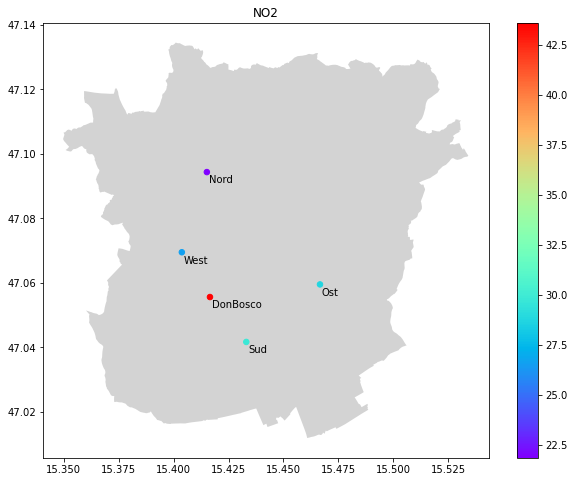

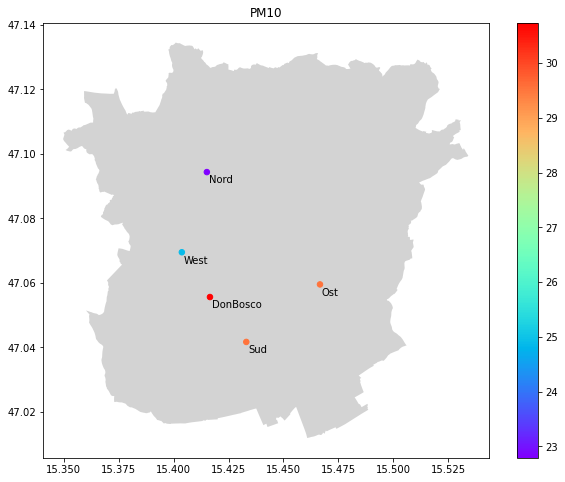

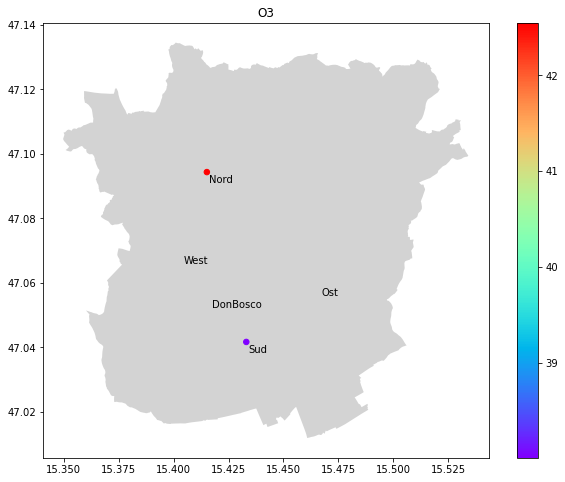

In [43]:
for i in ['NO2','PM10','O3']:
    fig, ax = plt.subplots(figsize = (10,8))
    area.to_crs(epsg=4326).plot(ax=ax, color='lightgrey')
    df.plot(column = i, ax=ax, cmap = 'rainbow', legend = True, markersize = 30)
    for x, y, label in zip(df.geometry.x, df.geometry.y, df.index):
        ax.annotate(label, xy=(x, y), xytext=(2, -11), textcoords="offset points")
    plt.title(i)
    plt.show()